# Project on Machine Learning
## Part a): Producing the Data.
  &nbsp;&nbsp; We will opt for the VMC model for generating the data with 1 parameter $\alpha$. The data generated using a quantumdot model using the quantum harmonic oscillator potential with the following 2-electron trial-wave function
  $$\psi_T \equiv \exp\left(-\alpha\omega \left(r^2_1 + r^2_2\right)\right)$$
  where $r_i=\sum_d x^2_{i,d}$ is the position of electron $i$ with $i\in[0,1]$(integer). The data is then an energy estimate $E$ for each value of $\alpha$. We read in the data with python using a self-made script from file plotqd.py and plot the points with matplotlib).

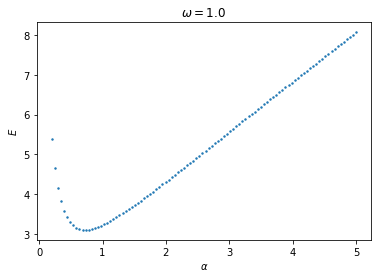

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotqd import reader

# read in data
data = reader("data1parameter")

# plot data points with error-bars and fill between the bars
plt.errorbar(data[:,4], data[:,1], 
             yerr=data[:,3], fmt='o', markersize=1.5, ecolor='blue', capthick=1, alpha=0.9,
             label="Data-points")
plt.fill_between(data[:,4], data[:,1]-data[:,3], data[:,1]+data[:,3], 
                 alpha=0.2, facecolor='blue')
plt.title("$\\omega = %s$" % str(data[0,0]))
plt.legened(loc='best')
plt.xlabel("$\\alpha$")
plt.ylabel("$E$")
plt.show()

## Part b): Estimating the Standard Deviation.
  &nbsp;&nbsp; We use the bootstrap method to estimate the true standard deviation of the data generated in part a).

## Part c): Fitting the Data Using Regression Analysis and Other Methods
&nbsp;&nbsp; Using a least-squares approach we can fit our data with a function of the following form
$$y(x_i) = \sum\limits^{n-1}_{j=0}\beta_if_j(x_i) + \varepsilon_i$$
where $y(x_i)$ is our response (energy) for given input $x_i$ ($\alpha$), $\beta$'s are the parameters to be determined (by minimization according to least squares), $f_j$ are choosen fit functions and $\varepsilon_i$ is the error(standard deviation) for given $y(x_i)$ and $n$ is the number of fit functions to be used. For this project we use a polynomial meaning $f_j(x_i)\equiv x^j_i$, that is a linear combination of a polynomial of degree $n$.

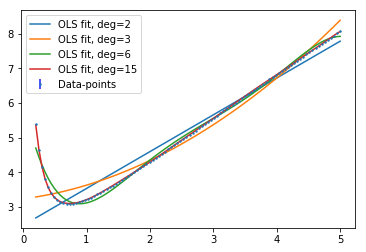

In [48]:
from scipy.optimize import curve_fit
def fitPlot(deg, f, x, y, e):
    """ function for LS fit(using scipy) """
    def xFun(x, *n):
        """ general fit function """
        X = np.zeros(np.shape(x))
        for i in range(x.size):
            for j in range(len(n)):
                X[i] += n[j] * f(x[i], j)
        return X
    
    # fit curve
    P, C = curve_fit(xFun, x, y+e, p0=tuple([0 for i in range(deg)]))
    
    # plot fitted curve
    plt.plot(x, xFun(x, *P), '-', label="OLS fit, deg=%i" % deg)


# replot data-points from a
plt.errorbar(data[:,4], data[:,1], 
             yerr=data[:,3], fmt='o', markersize=1.5, ecolor='blue', capthick=1, alpha=0.9,
             label="Data-points")
plt.fill_between(data[:,4], data[:,1]-data[:,3], data[:,1]+data[:,3], 
                 alpha=0.2, facecolor='blue')

# fit function f
f = lambda xi, i: xi**i

# fit with n-
fitPlot(2, f, data[:,4], data[:,1], data[:,3])
fitPlot(3, f, data[:,4], data[:,1], data[:,3])
fitPlot(6, f, data[:,4], data[:,1], data[:,3])
fitPlot(15, f, data[:,4], data[:,1], data[:,3])
plt.legend(loc='best')
plt.show()
    